## Linear Programming

1. https://www.youtube.com/watch?v=7yZ5xxdkTb8
2. http://benalexkeen.com/linear-programming-with-python-and-pulp-part-1/


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pulp
%matplotlib inline

In [2]:
# x > 0
x = np.linspace(0, 20, 2000)
# y >= 2
y1 = (x*0) + 2
# 2y <= 25 - x
y2 = (25-x)/2.0
# 4y >= 2x - 8 
y3 = (2*x-8)/4.0
# y <= 2x - 5 
y4 = 2 * x -5


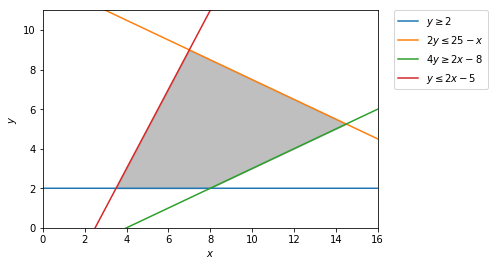

In [8]:
plt.plot(x, y1, label=r'$y\geq2$')
plt.plot(x, y2, label=r'$2y\leq25-x$')
plt.plot(x, y3, label=r'$4y\geq 2x - 8$')
plt.plot(x, y4, label=r'$y\leq 2x-5$')
plt.xlim((0, 16))
plt.ylim((0, 11))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
y5 = np.minimum(y2, y4)
y6 = np.maximum(y1, y3)
plt.fill_between(x, y5, y6, where=y5>y6, color='grey', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [13]:
# Now the same thing as pulp
lp_problem = pulp.LpProblem("My LP Problem", pulp.LpMaximize)
x = pulp.LpVariable('x', lowBound=0, cat='Continuous')
y = pulp.LpVariable('y', lowBound=2, cat='Continuous')
# Objective function
lp_problem += 4 * x + 3 * y, "Z"

# Constraints
lp_problem += 2 * y <= 25 - x
lp_problem += 4 * y >= 2 * x - 8
lp_problem += y <= 2 * x - 5

In [14]:
lp_problem

My LP Problem:
MAXIMIZE
4*x + 3*y + 0
SUBJECT TO
_C1: x + 2 y <= 25

_C2: - 2 x + 4 y >= -8

_C3: - 2 x + y <= -5

VARIABLES
x Continuous
2 <= y Continuous

In [16]:
lp_problem.solve()
pulp.LpStatus[lp_problem.status]

'Optimal'

In [21]:
for variable in lp_problem.variables():
    print("{} = {}".format(variable.name, variable.varValue))

x = 14.5
y = 5.25


In [22]:
print(pulp.value(lp_problem.objective))

73.75
